In [ ]:
import numpy as np

# Function to apply rotation and scaling
def apply_transformation(points, rotation_matrix, scaling_factor):
    points = points.dot(rotation_matrix.T)  # Apply rotation
    points *= scaling_factor  # Apply scaling
    return points

# Generate points for a sphere
def generate_sphere(num_points):
    points = np.random.randn(num_points, 3)
    points /= np.linalg.norm(points, axis=1).reshape(-1, 1)  # Normalize to unit sphere
    return points

# Generate points for a cube
def generate_cube(num_points):
    points = np.random.uniform(-1, 1, (num_points, 3))  # Uniform points inside a cube
    return points

# Generate points for a cone
def generate_cone(num_points):
    # Points in a cone shape (circular base)
    angle = np.random.uniform(0, 2 * np.pi, num_points)
    height = np.random.uniform(0, 1, num_points)
    radius = np.sqrt(np.random.uniform(0, 1, num_points))
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    z = height
    return np.column_stack((x, y, z))

# Generate points for a cylinder
def generate_cylinder(num_points):
    # Points in a cylinder (circular base)
    angle = np.random.uniform(0, 2 * np.pi, num_points)
    height = np.random.uniform(0, 1, num_points)
    radius = np.ones(num_points)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    z = height
    return np.column_stack((x, y, z))

# Generate points for a pyramid
def generate_pyramid(num_points):
    # Points inside a pyramid (square base)
    base_points = np.random.uniform(-1, 1, (num_points, 2))
    height = np.random.uniform(0, 1, num_points)
    points = np.column_stack((base_points, height))
    return points

# Main function to generate the shapes
def generate_shapes(num_samples=1000, num_points=6000):
    shape_generators = {
        'sphere': generate_sphere,
        'cube': generate_cube,
        'cone': generate_cone,
        'cylinder': generate_cylinder,
        'pyramid': generate_pyramid
    }

    shapes = {}
    for shape_name, shape_func in shape_generators.items():
        shapes[shape_name] = [shape_func(num_points) for _ in range(num_samples)]

    return shapes

# Example usage
shapes = generate_shapes()

# Now, the shapes dictionary will contain 1000 samples for each of the 5 shapes, each with 2000 points.


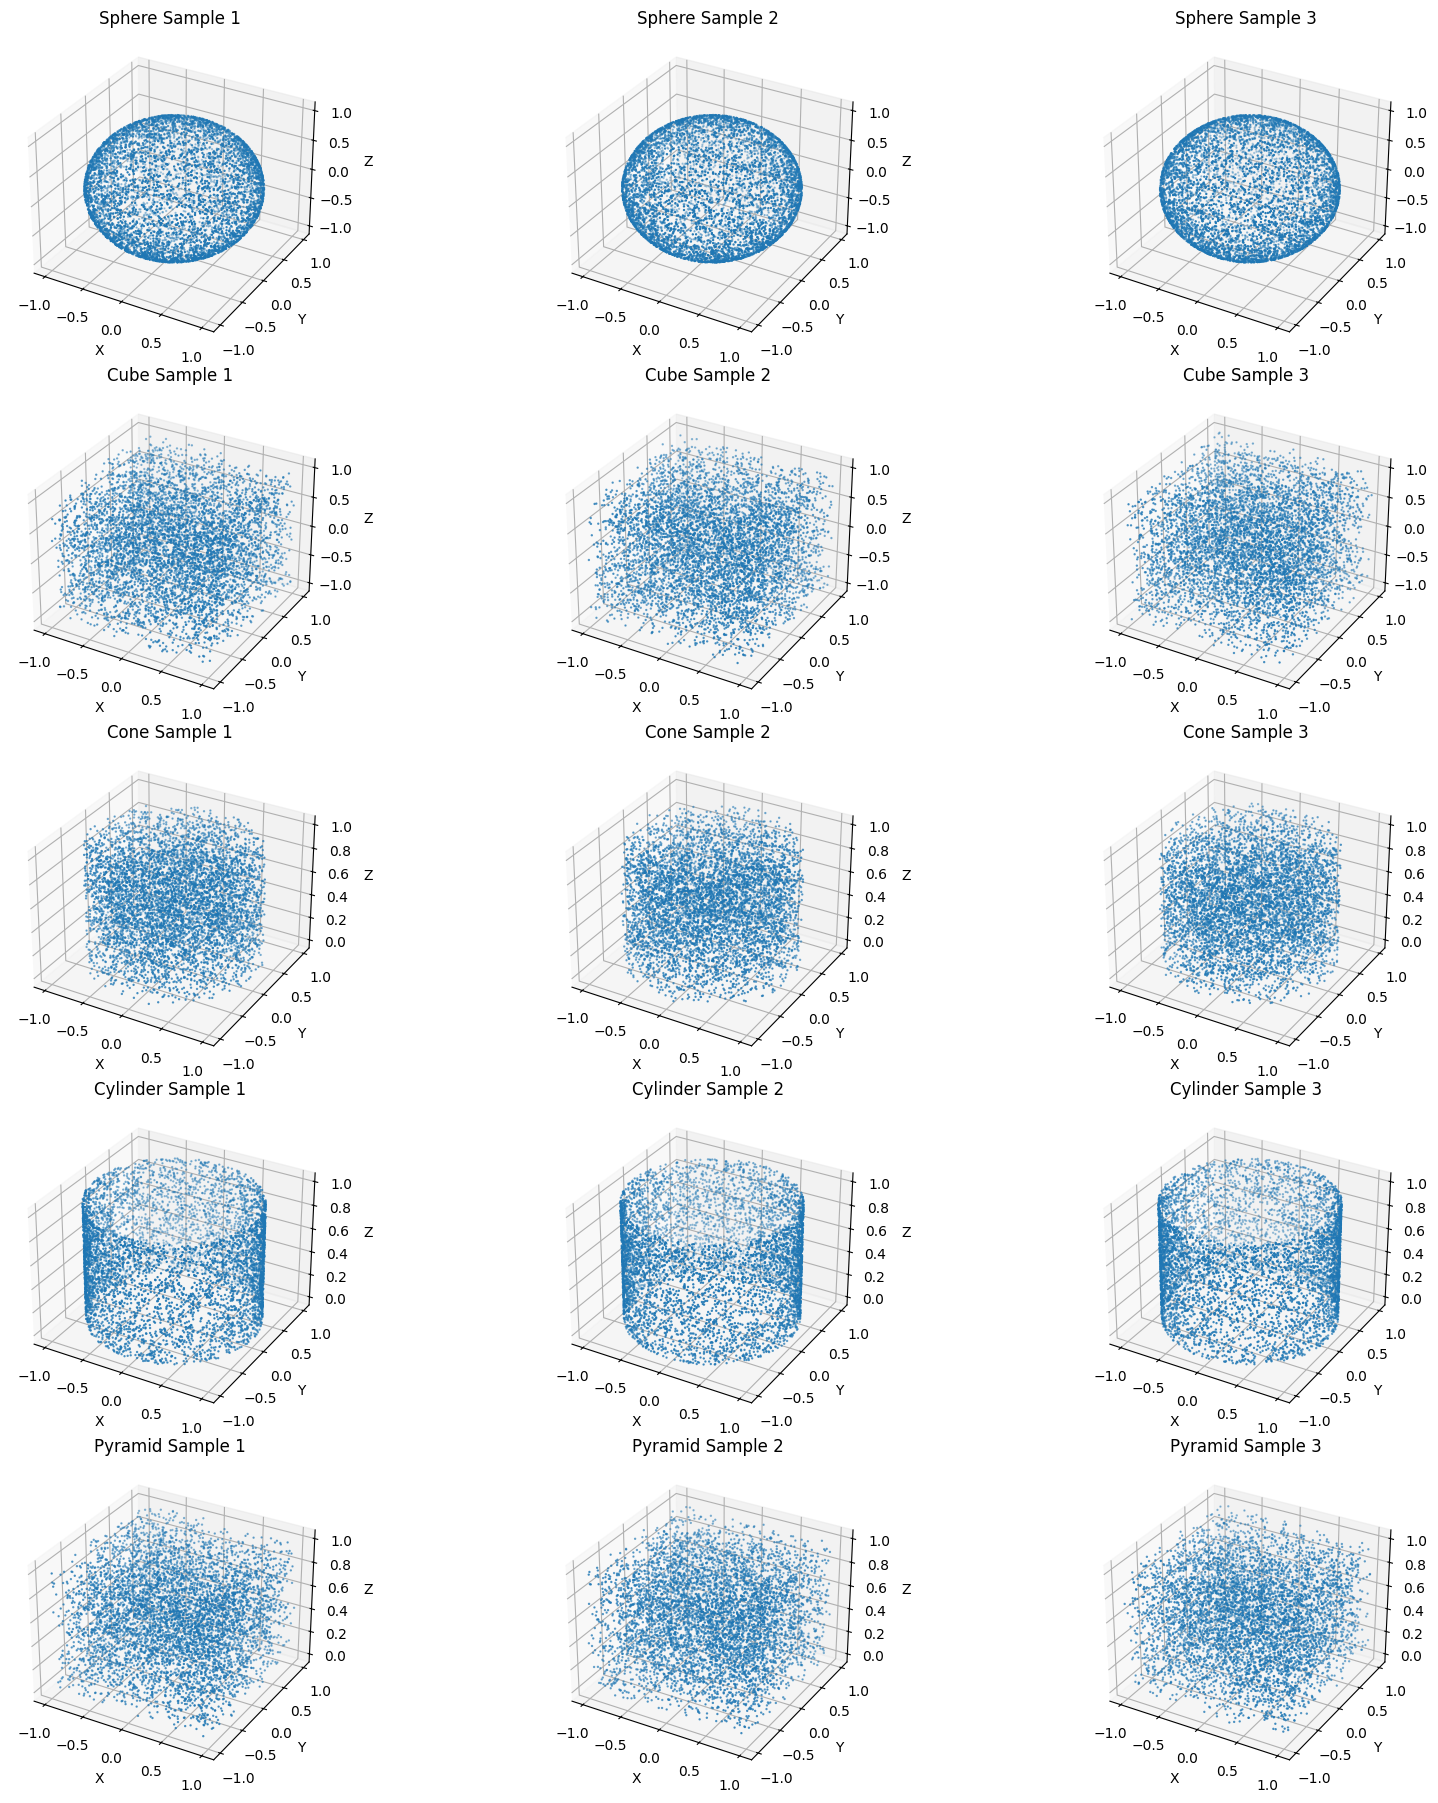

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to visualize 3 samples of each shape class
def visualize_samples(shapes):
    fig = plt.figure(figsize=(18, 18))

    # Loop through each shape class and visualize 3 samples
    for idx, shape_name in enumerate(shapes.keys()):
        for sample_idx in range(3):
            ax = fig.add_subplot(len(shapes), 3, idx * 3 + sample_idx + 1, projection='3d')
            ax.scatter(shapes[shape_name][sample_idx][:, 0],
                       shapes[shape_name][sample_idx][:, 1],
                       shapes[shape_name][sample_idx][:, 2], s=0.5)
            ax.set_title(f'{shape_name.capitalize()} Sample {sample_idx + 1}')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')

    plt.tight_layout()
    plt.show()

# Example usage to visualize the shapes
visualize_samples(shapes)


In [ ]:
import numpy as np
import os

# Function to save dataset as .npy files
def save_dataset(shapes, output_folder="shapes_dataset"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each shape class and save the dataset
    for shape_name, shape_samples in shapes.items():
        for sample_idx, sample_data in enumerate(shape_samples):
            # Save each sample as a .npy file
            file_path = os.path.join(output_folder, f"{shape_name}_sample_{sample_idx + 1}.npy")
            np.save(file_path, sample_data)
            print(f"Saved {file_path}")

# Example usage to save the dataset
save_dataset(shapes)


Saved shapes_dataset/sphere_sample_1.npy
Saved shapes_dataset/sphere_sample_2.npy
Saved shapes_dataset/sphere_sample_3.npy
Saved shapes_dataset/sphere_sample_4.npy
Saved shapes_dataset/sphere_sample_5.npy
Saved shapes_dataset/sphere_sample_6.npy
Saved shapes_dataset/sphere_sample_7.npy
Saved shapes_dataset/sphere_sample_8.npy
Saved shapes_dataset/sphere_sample_9.npy
Saved shapes_dataset/sphere_sample_10.npy
Saved shapes_dataset/sphere_sample_11.npy
Saved shapes_dataset/sphere_sample_12.npy
Saved shapes_dataset/sphere_sample_13.npy
Saved shapes_dataset/sphere_sample_14.npy
Saved shapes_dataset/sphere_sample_15.npy
Saved shapes_dataset/sphere_sample_16.npy
Saved shapes_dataset/sphere_sample_17.npy
Saved shapes_dataset/sphere_sample_18.npy
Saved shapes_dataset/sphere_sample_19.npy
Saved shapes_dataset/sphere_sample_20.npy
Saved shapes_dataset/sphere_sample_21.npy
Saved shapes_dataset/sphere_sample_22.npy
Saved shapes_dataset/sphere_sample_23.npy
Saved shapes_dataset/sphere_sample_24.npy
S

In [ ]:
import numpy as np
import os
import pandas as pd

def load_and_print_statistics(dataset_folder="shapes_dataset"):
    # Initialize variables to track counts
    classes = []  # List to store unique shape names (classes)
    num_samples = []  # List to store the count of samples for each class
    num_points = []  # List to store the number of points per sample for each class

    # Loop through each file in the dataset folder
    for sample_file in os.listdir(dataset_folder):
        if sample_file.endswith('.npy'):
            # Extract class name from the file name (assuming the structure is shape_name_sample_idx.npy)
            shape_name = sample_file.split('_')[0]  # Get the shape name from the filename
            points = np.load(os.path.join(dataset_folder, sample_file))  # Load the point cloud data

            # Add the shape name to the class list if it's not already there
            if shape_name not in classes:
                classes.append(shape_name)
                num_samples.append(0)  # Initialize sample count for the new class
                num_points.append(points.shape[0])  # Store the number of points per sample

            # Increment the number of samples for the class
            idx = classes.index(shape_name)
            num_samples[idx] += 1

    # Create a DataFrame to show the results
    results = pd.DataFrame({
        'Class': classes,
        'Number of Samples': num_samples,
        'Number of Points per Sample': num_points
    })

    # Display the results as a table
    print(results)

# Example usage to load and print the statistics
dataset_folder = "shapes_dataset"  # Replace with your actual dataset path
load_and_print_statistics(dataset_folder)


      Class  Number of Samples  Number of Points per Sample
0    sphere               1000                         6000
1      cone               1000                         6000
2   pyramid               1000                         6000
3      cube               1000                         6000
4  cylinder               1000                         6000


In [ ]:
import torch
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Function to load the dataset and return inputs and targets
def load_and_split_dataset(dataset_folder="shapes_dataset", num_points=6000, test_size=0.2, output_file="targets.txt"):
    # Initialize lists to store all inputs and targets
    inputs = []
    targets = []

    # Define the label mapping
    label_map = {'sphere': 0, 'cone': 1, 'pyramid': 2, 'cube': 3, 'cylinder': 4}

    # Open the output file to write the targets
    with open(output_file, 'w') as f:
        # Loop through all files in the dataset folder
        for sample_file in os.listdir(dataset_folder):
            if sample_file.endswith('.npy'):
                # Debugging: print the filename
                print(f"Processing file: {sample_file}")

                # Load the point cloud sample
                point_cloud = np.load(os.path.join(dataset_folder, sample_file))

                # Extract the label from the filename (assumed format: shape_name_sample_idx.npy)
                shape_name = sample_file.split('_')[0]  # Get shape name as label
                print(f"Extracted label: {shape_name}")  # Debugging: print the extracted label

                # Map the class labels to integer values
                label = label_map.get(shape_name, -1)  # Get label from the map

                # If label is invalid (i.e., -1), skip this sample
                if label == -1:
                    print(f"Warning: Invalid label found in file {sample_file} - Label: {shape_name}")
                    continue  # Skip this sample

                # Write the target label to the output file
                f.write(f"{shape_name}: {label}\n")

                # Ensure the point cloud has exactly 6000 points
                if point_cloud.shape[0] != num_points:
                    indices = np.random.choice(point_cloud.shape[0], num_points, replace=True)
                    point_cloud = point_cloud[indices]

                # Append the point cloud and label to the lists
                inputs.append(point_cloud)
                targets.append(label)

    # Convert inputs and targets to numpy arrays first, then to tensors
    inputs = np.array(inputs)  # Convert list of point clouds to numpy array
    inputs = torch.tensor(inputs, dtype=torch.float32)  # Shape: [num_samples, num_points, 3]

    targets = np.array(targets)  # Convert list of labels to numpy array
    targets = torch.tensor(targets, dtype=torch.long)   # Shape: [num_samples]

    # Split the data into training and testing sets
    train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size=test_size, random_state=42)

    return train_inputs, test_inputs, train_targets, test_targets

# Example usage to load and split the dataset
dataset_folder = "shapes_dataset"  # Replace with the actual path to your dataset
train_inputs, test_inputs, train_targets, test_targets = load_and_split_dataset(dataset_folder)

# Print the shape of the inputs and targets to confirm the data has been loaded correctly
print(f"Train Input shape: {train_inputs.shape}")
print(f"Train Target shape: {train_targets.shape}")
print(f"Test Input shape: {test_inputs.shape}")
print(f"Test Target shape: {test_targets.shape}")


Streaming output truncated to the last 5000 lines.
Processing file: pyramid_sample_8.npy
Extracted label: pyramid
Processing file: cone_sample_464.npy
Extracted label: cone
Processing file: pyramid_sample_2.npy
Extracted label: pyramid
Processing file: cone_sample_953.npy
Extracted label: cone
Processing file: sphere_sample_561.npy
Extracted label: sphere
Processing file: cube_sample_620.npy
Extracted label: cube
Processing file: sphere_sample_306.npy
Extracted label: sphere
Processing file: cylinder_sample_31.npy
Extracted label: cylinder
Processing file: cube_sample_453.npy
Extracted label: cube
Processing file: cube_sample_376.npy
Extracted label: cube
Processing file: cylinder_sample_681.npy
Extracted label: cylinder
Processing file: cube_sample_31.npy
Extracted label: cube
Processing file: cube_sample_523.npy
Extracted label: cube
Processing file: cylinder_sample_8.npy
Extracted label: cylinder
Processing file: cone_sample_656.npy
Extracted label: cone
Processing file: cylinder_sa

In [ ]:
# Convert train_inputs and test_inputs to float32 using PyTorch's `.to()` method
train_inputs = train_inputs.to(torch.float32)  # Ensure it's in float32
test_inputs = test_inputs.to(torch.float32)    # Ensure it's in float32


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Check the shape of the input and targets
print(f"Train input shape: {train_inputs.shape}")
print(f"Train target shape before encoding: {train_targets.shape}")
print(f"Test input shape: {test_inputs.shape}")
print(f"Test target shape before encoding: {test_targets.shape}")

# Split the dataset into training and testing sets
# Since train_inputs and train_targets are already numpy arrays, we don't need to call `.numpy()`
train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    train_inputs, train_targets, test_size=0.2, random_state=42)

# Normalize the input data by converting to float32 using `.to()` for PyTorch tensors
# train_inputs = train_inputs.astype(np.float32)  # Ensure it's in float32
# test_inputs = test_inputs.astype(np.float32)    # Ensure it's in float32

# Check if labels are already one-hot encoded
print(f"train_targets shape before encoding: {train_targets.shape}")
print(f"test_targets shape before encoding: {test_targets.shape}")

# Apply one-hot encoding if needed
if len(train_targets.shape) == 1:  # Only apply to_categorical if labels are integer labels
    train_targets = tf.keras.utils.to_categorical(train_targets, num_classes=5)
    test_targets = tf.keras.utils.to_categorical(test_targets, num_classes=5)

# Check shapes after preprocessing
print(f"Train input shape: {train_inputs.shape}")
print(f"Train target shape: {train_targets.shape}")
print(f"Test input shape: {test_inputs.shape}")
print(f"Test target shape: {test_targets.shape}")


Train input shape: torch.Size([2560, 6000, 3])
Train target shape before encoding: torch.Size([2560])
Test input shape: torch.Size([640, 6000, 3])
Test target shape before encoding: torch.Size([640])
train_targets shape before encoding: torch.Size([2048])
test_targets shape before encoding: torch.Size([512])
Train input shape: torch.Size([2048, 6000, 3])
Train target shape: (2048, 5)
Test input shape: torch.Size([512, 6000, 3])
Test target shape: (512, 5)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the PointNet-like model for 3D point cloud classification
class PointNet(tf.keras.Model):
    def __init__(self, num_classes=5):
        super(PointNet, self).__init__()

        self.mlp1 = models.Sequential([
            layers.Conv1D(64, 1, activation='relu', input_shape=(6000, 3)),
            layers.Conv1D(128, 1, activation='relu'),
            layers.Conv1D(1024, 1, activation='relu')
        ])

        self.maxpool = layers.GlobalMaxPooling1D()  # Global max pooling to aggregate point-wise features

        self.fc1 = models.Sequential([
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.3)
        ])

        self.fc2 = models.Sequential([
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3)
        ])

        self.fc3 = layers.Dense(num_classes, activation='softmax')  # Output layer for classification

    def call(self, inputs):
        x = self.mlp1(inputs)  # Apply MLP to the input point cloud
        x = self.maxpool(x)  # Apply max pooling to aggregate the features
        x = self.fc1(x)  # Fully connected layer
        x = self.fc2(x)  # Another fully connected layer
        x = self.fc3(x)  # Final output layer for classification
        return x

# Initialize the model
model = PointNet(num_classes=5)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the input and output shapes
print(f"Train input shape: {train_inputs.shape}")
print(f"Train target shape: {train_targets.shape}")
print(f"Test input shape: {test_inputs.shape}")
print(f"Test target shape: {test_targets.shape}")

# Train the model
history = model.fit(train_inputs, train_targets, epochs=20, batch_size=32, validation_data=(test_inputs, test_targets))

# Print the final training and validation accuracy
print(f"Training accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_inputs, test_targets)
print(f"Test accuracy: {test_acc:.4f}")


Train input shape: torch.Size([2048, 6000, 3])
Train target shape: (2048, 5)
Test input shape: torch.Size([512, 6000, 3])
Test target shape: (512, 5)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3835 - loss: 1.2074 - val_accuracy: 1.0000 - val_loss: 0.2125
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0833 - val_accuracy: 1.0000 - val_loss: 9.2895e-04
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 7.8633e-04 - val_accuracy: 1.0000 - val_loss: 2.9861e-04
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 2.1286e-04 - val_accuracy: 1.0000 - val_loss: 3.6606e-05
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 2.9005e-05 - val_accuracy: 1.0000 - val_loss: 1.2158e-05
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 1.1111e-05 - val_accuracy: 1.0000 - val_loss: 6.4713e-06
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 6.2207e-06 - val_accuracy: 1.0000 - val_loss: 4.1562e-06
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


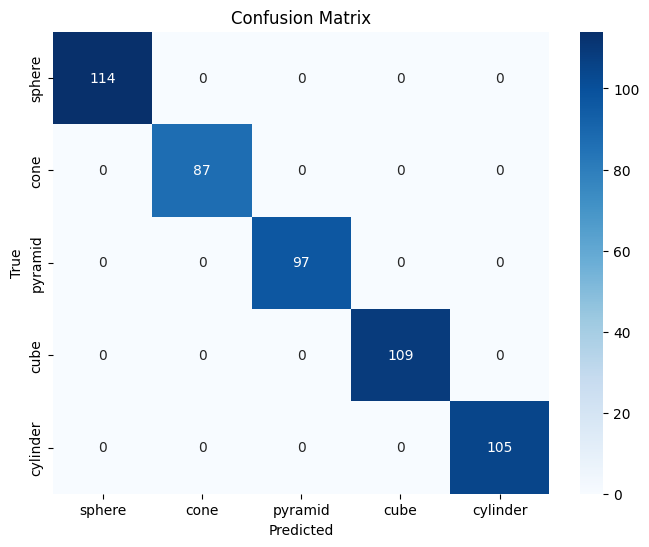

[[114   0   0   0   0]
 [  0  87   0   0   0]
 [  0   0  97   0   0]
 [  0   0   0 109   0]
 [  0   0   0   0 105]]


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Make predictions on the test set
predictions = model.predict(test_inputs)  # Get predicted probabilities (shape: [num_samples, num_classes])
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Step 2: Get the true labels (class indices)
true_classes = np.argmax(test_targets, axis=1)  # Convert one-hot encoded labels to class indices

# Step 3: Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["sphere", "cone", "pyramid", "cube", "cylinder"], yticklabels=["sphere", "cone", "pyramid", "cube", "cylinder"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(cm)


### The GAN part

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Set parameters
LATENT_DIM = 100  # Dimension of the random noise vector
NUM_POINTS = 6000  # Number of points per point cloud
BATCH_SIZE = 32
EPOCHS = 50

# Generator Model
def build_generator(latent_dim, num_points):
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(num_points * 3, activation='tanh'))  # Output shape (num_points, 3)
    model.add(layers.Reshape((num_points, 3)))  # Reshape to (num_points, 3)
    return model

# Discriminator Model
def build_discriminator(num_points):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(num_points, 3)))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output: 1 (real/fake)
    return model

# GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during GAN training
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Build the generator, discriminator, and GAN
generator = build_generator(LATENT_DIM, NUM_POINTS)
discriminator = build_discriminator(NUM_POINTS)
gan = build_gan(generator, discriminator)

# Compile the models
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training Loop
def train_gan(generator, discriminator, gan, train_inputs, epochs, batch_size, latent_dim):
    # Normalize inputs if using numpy
    if isinstance(train_inputs, np.ndarray):
        train_inputs = (train_inputs - np.min(train_inputs)) / (np.max(train_inputs) - np.min(train_inputs))  # Normalize to [0, 1]

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, train_inputs.shape[0], batch_size)
        real_point_clouds = train_inputs[idx]

        # Generate fake point clouds
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_point_clouds = generator.predict(noise)

        # Labels for real and fake data
        real_labels = np.ones((batch_size, 1))  # Real labels = 1
        fake_labels = np.zeros((batch_size, 1))  # Fake labels = 0

        # Train discriminator on real and fake data
        d_loss_real = discriminator.train_on_batch(real_point_clouds, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_point_clouds, fake_labels)

        # Train GAN (only generator is trained, as the discriminator is frozen)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # Labels for generator = 1 (we want the generator to fool the discriminator)

        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 10 == 0:
            print(f"{epoch}/{epochs} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]")

# Train the GAN
train_gan(generator, discriminator, gan, train_inputs, epochs=EPOCHS, batch_size=BATCH_SIZE, latent_dim=LATENT_DIM)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0/50 [D loss: [0.5523856 0.6796875]] [G loss: [array(0.6127737, dtype=float32), array(0.6127737, dtype=float32), array(0.453125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
10/50 [D loss: [11.541232   0.4580966]] [G loss: [array(12.231312, dtype=float32), array(12.231312, dtype=float32), array(0.4474432, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
20/50 [D loss: [17.624361    0.46316963]] [G loss: [array(18.03347, dtype=float32), array(18.03347, dtype=float32), array(0.4575

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


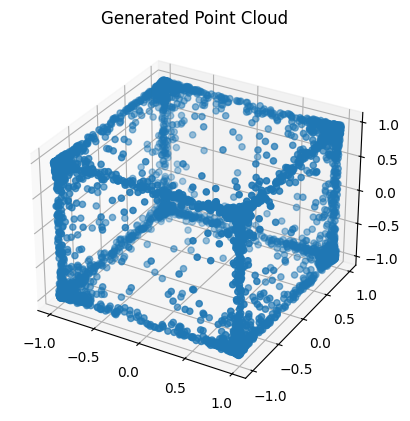

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a batch of random noise
noise = np.random.normal(0, 1, (10, LATENT_DIM))

# Generate point clouds from the noise
generated_point_clouds = generator.predict(noise)

# Visualize the first generated point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in the 3D space
ax.scatter(generated_point_clouds[0][:, 0], generated_point_clouds[0][:, 1], generated_point_clouds[0][:, 2])
ax.set_title('Generated Point Cloud')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


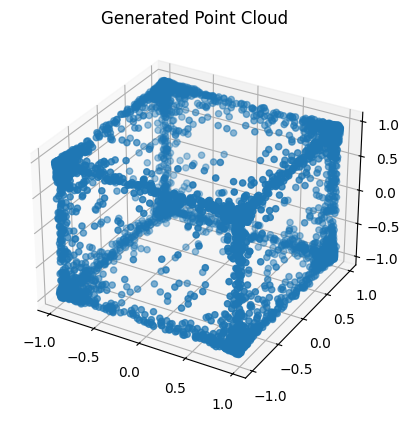

'generated_point_cloud.png'

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a batch of random noise
noise = np.random.normal(0, 1, (10, LATENT_DIM))

# Generate point clouds from the noise
generated_point_clouds = generator.predict(noise)

# Visualize the first generated point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in the 3D space
ax.scatter(generated_point_clouds[0][:, 0], generated_point_clouds[0][:, 1], generated_point_clouds[0][:, 2])
ax.set_title('Generated Point Cloud')

# Save the plot as an image file
output_path = 'generated_point_cloud.png'  # Define the output file path
plt.savefig(output_path)

# Display the plot
plt.show()

# Return the file path for reference
output_path


In [ ]:
import numpy as np
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from scipy.linalg import sqrtm

# Example generated point cloud (assuming generator.predict(noise) generates 3D points)
generated_point_clouds = generator.predict(noise)

# Example of creating a random real point cloud (replace this with actual data if available)
real_point_cloud = np.random.rand(6000, 3)  # Generate 6000 random points for demonstration

# Function to check collinearity (Geometric Correctness)
def check_collinearity(points):
    for i in range(len(points) - 2):
        p1, p2, p3 = points[i], points[i+1], points[i+2]
        area = 0.5 * np.abs(p1[0]*(p2[1] - p3[1]) + p2[0]*(p3[1] - p1[1]) + p3[0]*(p1[1] - p2[1]))
        if area == 0:
            return False
    return True

# SSIM metric (after converting point clouds to images)
def compute_ssim(real_point_cloud, generated_point_cloud):
    real_img = np.histogram2d(real_point_cloud[:,0], real_point_cloud[:,1], bins=(64, 64))[0]
    generated_img = np.histogram2d(generated_point_cloud[:,0], generated_point_cloud[:,1], bins=(64, 64))[0]

    real_img = (real_img - real_img.min()) / (real_img.max() - real_img.min())
    generated_img = (generated_img - generated_img.min()) / (generated_img.max() - generated_img.min())

    # Set data_range to 1 since we normalized the images to [0, 1]
    return ssim(real_img, generated_img, data_range=1)

# Example usage:
print("SSIM:", compute_ssim(real_point_cloud, generated_point_clouds[0]))


# Compute Coordinate Distance (Euclidean distance between points)
def compute_coordinate_distance(real_points, generated_points):
    assert real_points.shape == generated_points.shape, "Shape mismatch"
    return np.mean(np.linalg.norm(real_points - generated_points, axis=1))

# Radius Deviation (for circles)
def compute_radius_deviation(real_circle_points, generated_circle_points):
    real_radius = np.mean(np.linalg.norm(real_circle_points, axis=1))
    generated_radius = np.mean(np.linalg.norm(generated_circle_points, axis=1))
    return np.abs(real_radius - generated_radius)

# Fréchet Inception Distance (FID)
def compute_fid(real_point_clouds, generated_point_clouds):
    model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    real_imgs = preprocess_to_images(real_point_clouds)
    generated_imgs = preprocess_to_images(generated_point_clouds)
    real_features = model.predict(real_imgs)
    generated_features = model.predict(generated_imgs)

    mean_real = np.mean(real_features, axis=0)
    mean_gen = np.mean(generated_features, axis=0)
    cov_real = np.cov(real_features, rowvar=False)
    cov_gen = np.cov(generated_features, rowvar=False)

    # Corrected: Using scipy.linalg.sqrtm to compute the matrix square root
    sqrt_cov = sqrtm(np.dot(cov_real, cov_gen))
    fid = np.linalg.norm(mean_real - mean_gen) + np.trace(cov_real + cov_gen - 2 * sqrt_cov)
    return fid

# Inception Score (IS)
def compute_inception_score(generated_point_clouds):
    model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    generated_imgs = preprocess_to_images(generated_point_clouds)
    preds = model.predict(generated_imgs)
    kl_divergence = mean_squared_error(np.mean(preds, axis=0), preds)
    return np.exp(kl_divergence)

# Helper function to preprocess point clouds to images (this needs to be defined)
def preprocess_to_images(point_clouds):
    # Placeholder function for converting point clouds to 2D images
    # Replace with actual conversion method based on your needs
    return np.random.rand(len(point_clouds), 299, 299, 3)

# Example to evaluate the metrics
generated_point_cloud = generated_point_clouds[0]  # Assuming this is the first generated point cloud

# Geometric Correctness
print("Geometric Correctness:", check_collinearity(generated_point_cloud))

# SSIM
print("SSIM:", compute_ssim(real_point_cloud, generated_point_cloud))

# Coordinate Distance
print("Coordinate Distance:", compute_coordinate_distance(real_point_cloud, generated_point_cloud))

# Radius Deviation (for circles, if applicable)
print("Radius Deviation:", compute_radius_deviation(real_point_cloud, generated_point_cloud))

# FID
print("FID:", compute_fid(real_point_cloud, generated_point_cloud))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
SSIM: 0.000619119362731618
Geometric Correctness: True
SSIM: 0.000619119362731618
Coordinate Distance: 1.735554972648908
Radius Deviation: 0.5554135772452119
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
FID: 0.1846835912339603


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Assuming generator and model are already defined and trained

# Step 1: Generate point clouds using the generator
noise = np.random.normal(0, 1, (1, LATENT_DIM))  # Generate random noise for 1 sample
generated_point_clouds = generator.predict(noise)  # Generate point clouds from noise

# Step 2: Feed the generated point cloud into the trained PointNet model for classification
generated_point_clouds = np.reshape(generated_point_clouds, (generated_point_clouds.shape[0], 6000, 3))  # (batch_size, num_points, 3)

# Step 3: Predict class probabilities
predictions = model.predict(generated_point_clouds)  # Predict class probabilities for the generated point cloud

# Step 4: Prepare data for table
class_names = ['sphere', 'cone', 'pyramid', 'cube', 'cylinder']
probabilities = predictions[0]  # Get the probabilities for the generated point cloud

# Create a DataFrame for easy visualization
df = pd.DataFrame({
    'Class': class_names,
    'Probability': probabilities
})

# Display the table
print(df)

# Step 5: Print the conclusion
max_class = class_names[np.argmax(probabilities)]
max_prob = np.max(probabilities)
conclusion = f"Based on the model's predictions, the generated point cloud is classified as a {max_class} with a probability of {max_prob:.4f}. " \
             f"The model assigns very low probabilities to other classes, suggesting high confidence in the classification."

print(conclusion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
      Class   Probability
0    sphere  5.565104e-09
1      cone  8.596561e-17
2   pyramid  6.281950e-08
3      cube  9.999999e-01
4  cylinder  1.198771e-09
Based on the model's predictions, the generated point cloud is classified as a cube with a probability of 1.0000. The model assigns very low probabilities to other classes, suggesting high confidence in the classification.


In [32]:
from google.colab import auth
auth.authenticate_user()



In [33]:
!apt-get install git



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [41]:
import os
from getpass import getpass

# Get your new GitHub token
token = getpass('Enter your new GitHub token: ')  # This will prompt you to securely enter the new token

# Save your GitHub token to an environment variable
os.environ['GITHUB_TOKEN'] = token


Enter your new GitHub token: ··········


In [42]:
!git config --global user.name "fahimehorvatinia"
!git config --global user.email "fahimehorvatinia1998@gmail.com"

# Add changes, commit, and push using the updated token
!git add .
!git commit -m "Updated project in Colab"
!git push https://$GITHUB_TOKEN@github.com/fahimehorvatinia/Geometric-Shape-Generation-GAN.git


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [45]:
!git add .  # Add all changes to the staging area
!git commit -m "Updated project with latest models and evaluation code"
!git push https://$GITHUB_TOKEN@github.com/fahimehorvatinia/Geometric-Shape-Generation-GAN.git



On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [46]:
# First, navigate to the correct directory
%cd /content/Geometric-Shape-Generation-GAN/

# Open and modify the README.md file
with open('README.md', 'a') as f:  # Using 'a' to append the content
    f.write("\n# New Section\n")
    f.write("Add your new content here...")


/content/Geometric-Shape-Generation-GAN


In [47]:
# Check the status to make sure everything is up-to-date
!git status

# Add the updated README.md file to the staging area
!git add README.md

# Commit the changes with a message
!git commit -m "Updated README with new results and model details"


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Geometric-Shape-Generation-GAN/

no changes added to commit (use "git add" and/or "git commit -a")
[main e32802b] Updated README with new results and model details
 1 file changed, 3 insertions(+)


In [52]:
!git add .
!git commit -m "Added Geometric-Shape-Generation-GAN contents"
!git push https://$GITHUB_TOKEN@github.com/fahimehorvatinia/Geometric-Shape-Generation-GAN.git


[main 4bb69af] Added Geometric-Shape-Generation-GAN contents
 1 file changed, 1 insertion(+)
 create mode 160000 Geometric-Shape-Generation-GAN
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 12 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 604 bytes | 604.00 KiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 2 local objects.
To https://github.com/fahimehorvatinia/Geometric-Shape-Generation-GAN.git
   b047676..4bb69af  main -> main


In [51]:
!git rm --cached Geometric-Shape-Generation-GAN


error: the following file has staged content different from both the
file and the HEAD:
    Geometric-Shape-Generation-GAN
(use -f to force removal)


In [53]:
%cd /content/Geometric-Shape-Generation-GAN
!nano README.md


/content/Geometric-Shape-Generation-GAN
/bin/bash: line 1: nano: command not found


In [54]:
!git add GAN.ipynb
!git commit -m "Add GAN.ipynb notebook"
!git push origin main


fatal: pathspec 'GAN.ipynb' did not match any files
On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   Geometric-Shape-Generation-GAN (untracked content)

no changes added to commit (use "git add" and/or "git commit -a")
fatal: could not read Username for 'https://github.com': No such device or address
